BASC0038 Algorithms, Logic and Structure

# Week 2: Quadratic sorting

Author: Sam J. Griffiths (sam.griffiths.19@ucl.ac.uk)

---

# Selection sort

## Description

Take a list of $n$ elements. Arguably the most instinctive human way to sort this list into order would be to continually scan through the list, each time selecting the next-smallest element to build up a sorted list. For example, with a list such as

$$(3,9,8,1,5,2,6,7,4)$$

it would be natural for a human to first select $1$, then $2$, then $3$ etc. This algorithm is known as *selection sort*:

*   Linearly search through the entire array of $n$ elements to determine the smallest.
*   Swap the smallest element into the first position in the array.
*   Repeat the search from the second element onwards (i.e. $n-1$ elements) and swap the next-smallest into the second position in the array.
*   Repeat until the entire array is sorted.



## ✍️ Exercise: Selection sort

Implement selection sort as `selection_sort`, a function taking an `array` to sort and returning a sorted copy of the `array`.

Notes:

*   There are generally two options: work in-place to edit the array provided (so one would simply use `sort(array)`) or return a new, sorted copy without editing the original (so once would use `sorted_array = sort(array)`). The latter is a more functional style that we will use for now. Therefore, your function should begin by making a copy of the array to work on, which can be done via `result = array.copy()`.
*   To find the smallest element in a list, set an index to the first
element, representing the current-smallest. Then, scan through the entire list, comparing each element to the current-smallest, updating the index if an element is smaller. Upon reaching the end, the index will point to the smallest overall element.
*   To efficiently swap two elements in `array` at indices `a` and `b`, you can use `array[a], array[b] = array[b], array[a]`.

<h2>👇</h2>

In [ ]:
def selection_sort(array):
  """Sort a list via selection sort.

  Args:
    array: Unsorted list.

  Returns:
    A new list containing all elements in array, sorted.

  """
  n = len(array)
  result = array.copy()
  for i in range(n):
    # Find next-smallest value
    smallest = i
    for j in range(i + 1, n):
      if result[j] < result[smallest]:
        smallest = j
    # Swap next-smallest value into position
    if i != smallest:
      result[i], result[smallest] = result[smallest], result[i]

  return result

🟢

In [ ]:
# Output should be:
# [-6, -1, 0, 2, 2, 4, 6, 9, 9, 54, 190]

array = [9, 4, 2, 6, 2, -1, 0, 9, 54, 190, -6]
print(selection_sort(array))

[-6, -1, 0, 2, 2, 4, 6, 9, 9, 54, 190]


## ➕✍️ Extra: Selection sort (recursive)

Implement a recursive version of selection sort as `selection_sort_recursive`. Note that the base case is an array of length 0 or 1 already being sorted. Hint: one step of selection sort swaps the smallest element into the first position, leaving the rest of the array after the first element remaining to be sorted.

<h2>👇</h2>

In [ ]:
def selection_sort_recursive(array):
  """Sort a list via recursive selection sort.

  Args:
    array: Unsorted list.

  Returns:
    A new list containing all elements in array, sorted.

  """
  # Base case for empty or singular list
  n = len(array)
  if n < 2:
    return array

  # Find smallest value
  result = array.copy()
  smallest = 0
  for i in range(1, n):
    if result[i] < result[smallest]:
      smallest = i

  # Swap smallest into first position
  if smallest != 0:
    result[0], result[smallest] = result[smallest], result[0]

  # Recur on remainder of array
  return [result[0]] + selection_sort_recursive(result[1:])

🟢

In [ ]:
# Output should be:
# [-6, -1, 0, 2, 2, 4, 6, 9, 9, 54, 190]

array = [9, 4, 2, 6, 2, -1, 0, 9, 54, 190, -6]
print(selection_sort_recursive(array))

[-6, -1, 0, 2, 2, 4, 6, 9, 9, 54, 190]


## Complexity analysis

As with the search algorithms, let us quantify the number of comparisons performed as the elementary operation (you could alternatively consider the number of swaps).

In a selection sort of $n$ elements, the first element must be compared with all $n-1$ others. Then, the second element must be compared with all remaining $n-2$ others, and so on and so forth until there are two elements remaining with 1 comparison:

\begin{align}
T(n) &= n-1 + n-2 + n-3 + \dots + 1
\end{align}

Note that this is an arithmetic series, wherein the sum can be calculated as the number of elements in the series, multiplied by the sum of the first and last elements, divided by 2:

\begin{align}
T(n) &= \frac{(n-1)(n-1+1)}{2} \\
&= \frac{1}{2}n^2 - \frac{1}{2}n \\
\therefore \quad T(n) &= O(n^2)
\end{align}

This applies to all instances: there is no best, average or worst case for selection sort. Therefore, selection sort is quadratic-time in all cases.

# Insertion sort

## Description

Insertion sort is a similar but distinct algorithm to selection sort. In insertion sort, we consider each element in the array one by one. Each element is swapped back with its previous element until it is in the correct position in the sorted sub-array which builds up as a result.

For example, firstly the first element in the array is already in the correct position for a sorted sub-array of 1 element. If the second element is smaller than the first, it is swapped with it, otherwise it is simply left where it is. This results in a sorted sub-array of 2 elements. The next element is swapped backwards repeatedly until it is in the correct position, before moving on to the next element.

## ✍️ Exercise: Insertion sort

Implement insertion sort as `selection_sort`, a function taking an `array` to sort and returning a sorted copy of the `array`.

<h2>👇</h2>

In [ ]:
def insertion_sort(array):
  """Sort a list via insertion sort.

  Args:
    array: Unsorted list.

  Returns:
    A new list containing all elements in array, sorted.

  """
  n = len(array)
  result = array.copy()

  # Swap each value backwards until in correct position
  for i in range(1, n):
    j = i
    while j > 0 and result[j] < result[j - 1]:
      result[j], result[j - 1] = result[j - 1], result[j]
      j -= 1

  return result

🟢

In [ ]:
# Output should be:
# [-6, -1, 0, 2, 2, 4, 6, 9, 9, 54, 190]

array = [9, 4, 2, 6, 2, -1, 0, 9, 54, 190, -6]
print(insertion_sort(array))

[-6, -1, 0, 2, 2, 4, 6, 9, 9, 54, 190]


## ➕✍️ Extra: Insertion sort (recursive)

Implement a recursive version of insertion sort as `insertion_sort_recursive`. Note that the base case is an array of length 0 or 1 already being sorted. Hint: one step of insertion sort is inserting the final element in the array backwards into the rest of it, which is already sorted.

<h2>👇</h2>

In [ ]:
def insertion_sort_recursive(array):
  """Sort a list via recursive insertion sort.

  Args:
    array: Unsorted list.

  Returns:
    A new list containing all elements in array, sorted.

  """
  # Base case for empty or singular list
  n = len(array)
  if n < 2:
    return array

  # Recursive case is last element to insert appended to sorted sub-list
  result = insertion_sort_recursive(array[:-1]) + [array[-1]]

  # Swap last value backwards until in correct position
  i = n - 1
  while i > 0 and result[i] < result[i - 1]:
    result[i], result[i - 1] = result[i - 1], result[i]
    i -= 1

  return result

🟢

In [ ]:
# Output should be:
# [-6, -1, 0, 2, 2, 4, 6, 9, 9, 54, 190]

array = [9, 4, 2, 6, 2, -1, 0, 9, 54, 190, -6]
print(insertion_sort_recursive(array))

[-6, -1, 0, 2, 2, 4, 6, 9, 9, 54, 190]


## Complexity analysis

Unlike selection sort, the worst, average and best cases of insertion sort are not trivially identical. Let us first consider the worst case, which is a list exactly in reverse order. At each step, the next element must be swapped all the way back to the beginning of the sorted sub-list, requiring a comparison with every element before it:

\begin{align}
T(n) &= 1 + \dots + n-3 + n-2 + n-1 \\
&= \frac{1}{2}n^2 - \frac{1}{2}n \\
\therefore \quad T(n) &= O(n^2)
\end{align}

Therefore, the worst case of insertion sort is identical in performance to all cases of selection sort.

Conversely, the best case of insertion sort is the list already being in the correct order. This means that, at each step, the next element is already in the correct position, needing only to be compared once to its preceding element:

\begin{align}
T(n) &= 1 + 1 + \dots + 1 \\
&= n - 1 \\
\therefore \quad T(n) &= O(n)
\end{align}

Therefore, insertion sort is linear-time in the best case.

In the average case, each element to be inserted is the expected value (i.e. the mean) of the sorted sub-list thus far as a probabilistic sample. Assuming a distribution symmetric about the mean (e.g. uniform or normal), each next element belongs in the middle of the sorted sub-list, such that it must be compared to *half* of the elements before it:

\begin{align}
T(n) &= \frac{1 + \dots + n-3 + n-2 + n-1}{2} \\
&= \frac{1}{4}n^2 - \frac{1}{4}n \\
\therefore \quad T(n) &= O(n^2)
\end{align}

Therefore, insertion sort is still quadratic-time in the average case, but requires roughly half as many comparisons compared to all cases of selection sort.

# Selection vs insertion sort

Selection sort and insertion sort are algorithms of similar complicatedness and are both $O(n^2)$ in the worst case -- not only that, but they in fact require the *exact same* number of comparisons in the worst case, i.e. a list being exactly in reverse order.

However, we have seen that insertion sort requires roughly half as many comparisons as selection sort on average. This is a major speedup in real terms and it is reasonable to prefer insertion sort from this fact alone. Indeed, insertion sort is the gold standard of the simple 'quadratic' sorting algorithms.

We have also seen that insertion sort is $O(n)$ in the best case of the list already being sorted, specifically requiring only $n-1$ comparisons. This is in fact optimal for the best case of any sorting problem, a fact of deep-reaching insight and consequence. Imagine you are provided with a list of values and you are asked to *verify that the list is sorted*. **This is not the same as being asked to sort the list!** You should be able to appreciate that verifying a list is sorted is an easier task than sorting a list\* &ndash; each element need only be compared with its preceding element to ensure the list is monotonically increasing, in $n-1$ comparisons. This is exactly what insertion sort does, so we can see that insertion sort directly degenerates to verifying the problem in the best case, hence branding it as optimal.

Insertion sort's optimal linear-time best case further its advantage over selection sort as it allows insertion sort to also perform outstandingly well for lists which are *almost* sorted &ndash; it is highly *adaptive* to its input. For searching algorithms, we assumed the best cases to be of almost no importance. For sorting, it is in fact quite likely generally speaking that real data is going to be sorted or nearly-sorted, so insertion sort's best and average case complexities are highly advantageous in most applications.

Insertion sort is also an *online* algorithm, in that it can be used to sort new elements into an already sorted collection, i.e. it can receive its input one-by-one rather than needing to consider the entire input from the beginning.

There is one main, limited point in selection sort's favour. Note that so far we have considered the number of comparisons, but it is also valid to consider the number of *swaps* performed as the elementary operation. Insertion sort requires $O(n^2)$ swaps in the worst and average cases and zero, i.e. $O(1)$, in the best case. However, selection sort requires only $O(n)$ swaps in its worst and average cases. This means that selection sort may be preferable in specific situations or systems where writing to memory is particularly expensive.

---

\*The fact that problems usually seem easier to verify than solve is a key insight, but also a uncertain one. In layman's terms, $\mathbf{P}$ is the set of problems which can be solved easily (polynomial time or better) and $\mathbf{NP}$ is the set of problems for which solutions can be verified easily. There *appears* to be many problems which can be verified easily but not solved easily, i.e. problems in $\mathbf{NP}$ but not in $\mathbf{P}$. However, this has *never yet been proved*! It *might* instead be the case that any problem easily verifiable is also easily solvable. It's yet to be proved whether $\mathbf{P}=\mathbf{NP}$ or $\mathbf{P}\neq\mathbf{NP}$, forming one of the most well-known and important open questions in computer science and mathematics, with an astonishingly wide range of implications across academic fields.

# ✍️ Exercise: Timing experiments

In the introductory worksheet, a simple Python framework for testing the time taken by functions and plotting the results was given. Using this framework, first plot a graph of experimental data for the time taken by selection sort vs insertion sort for ***best-case*** instances of $n \in \{100,200,300,\dots,1200\}$.

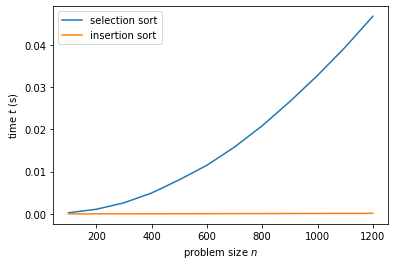

In [ ]:
import time

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def time_function(function, runs=1, average=min):
  """Test the execution time of a given function.

  Args:
    function: Function to time.
    runs (int, optional): Number of runs. Defaults to 1.

  Returns:
    Function time (minimum of runs).

  """
  results = [None] * runs
  for i in range(runs):
    t0 = time.perf_counter()
    function()
    t1 = time.perf_counter()
    results[i] = t1 - t0
  
  return average(results)


# n = {100, 200, 300, ..., 1200}
problem_sizes = [(i + 1) * 100 for i in range(12)]

# Lists of time results
t_selection_sort = []
t_insertion_sort = []

for n in problem_sizes:
  # List of numbers from 0 to n-1
  array = [i for i in range(n)]

  # Obtain minimum time of 10 runs for each algorithm
  runs = 10
  t_selection_sort.append(time_function(
      lambda: selection_sort(array),
      runs))
  t_insertion_sort.append(time_function(
      lambda: insertion_sort(array),
      runs))

# Plot graph of times
plt.plot(problem_sizes, t_selection_sort, label="selection sort")
plt.plot(problem_sizes, t_insertion_sort, label="insertion sort")
plt.legend()
plt.xlabel(r"problem size $n$")
plt.ylabel(r"time $t$ (s)")
plt.show()

You should be able to see an effectively-flat line for insertion sort's optimal best-case complexity and a quadratic curve for selection sort.

Next, repeat the experiment for ***worst-case*** instances.

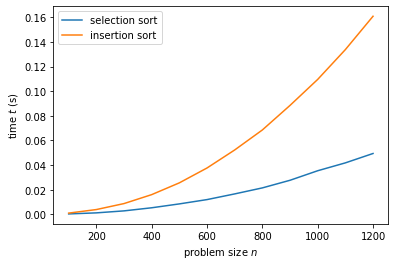

In [ ]:
import time

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def time_function(function, runs=1, average=min):
  """Test the execution time of a given function.

  Args:
    function: Function to time.
    runs (int, optional): Number of runs. Defaults to 1.

  Returns:
    Function time (minimum of runs).

  """
  results = [None] * runs
  for i in range(runs):
    t0 = time.perf_counter()
    function()
    t1 = time.perf_counter()
    results[i] = t1 - t0
  
  return average(results)


# n = {100, 200, 300, ..., 1200}
problem_sizes = [(i + 1) * 100 for i in range(12)]

# Lists of time results
t_selection_sort = []
t_insertion_sort = []

for n in problem_sizes:
  # List of numbers from n to 1
  array = [(n - i) for i in range(n)]

  # Obtain minimum time of 10 runs for each algorithm
  runs = 10
  t_selection_sort.append(time_function(
      lambda: selection_sort(array),
      runs))
  t_insertion_sort.append(time_function(
      lambda: insertion_sort(array),
      runs))

# Plot graph of times
plt.plot(problem_sizes, t_selection_sort, label="selection sort")
plt.plot(problem_sizes, t_insertion_sort, label="insertion sort")
plt.legend()
plt.xlabel(r"problem size $n$")
plt.ylabel(r"time $t$ (s)")
plt.show()

You should see two relatively smooth quadratic curves (minimum-of-10-runs as per the example usage in the previous worksheet should usually be fine here, but if there are any anomalies, just try running it again, or consider increasing to more than 10 runs). You should see selection sort significantly outperforming insertion sort. Have a think about why this is &ndash; we will address it hereinafter.

Now try repeating the above experiment for average usage. Rather than try to simulate the average case directly, you should randomly generate lists to see how the algorithms perform on arbitrary data. This time, for each value of $n$, you should repeat the test on 5 different randomly-generated lists of length $n$ (still taking the minimum-of-10-runs for each) and take the mean as the final result for that value of $n$.

To generate a random value, first `import random`. The function `random.random()` will generate a random floating-point value between 0 and 1. Alternatively, `random.randint(x)` returns a random integer value using the same syntax as `range(x)`, i.e. from `0` to `x-1`.

Remember that both algorithms should be tested on the same random lists, in order to make it a fair test.

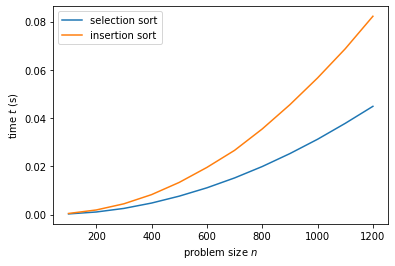

In [ ]:
import time
import random
import statistics

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def time_function(function, runs=1, average=min):
  """Test the execution time of a given function.

  Args:
    function: Function to time.
    runs (int, optional): Number of runs. Defaults to 1.

  Returns:
    Function time (minimum of runs).

  """
  results = [None] * runs
  for i in range(runs):
    t0 = time.perf_counter()
    function()
    t1 = time.perf_counter()
    results[i] = t1 - t0
  
  return average(results)


# n = {100, 200, 300, ..., 1200}
problem_sizes = [(i + 1) * 100 for i in range(12)]

# Lists of time results
t_selection_sort = []
t_insertion_sort = []

# Number of random samples to take
rand_samples = 5

for n in problem_sizes:
  # Times recorded for this value of n
  t_n_selection_sort = []
  t_n_insertion_sort = []

  for _ in range(rand_samples):
    # Random list of length n
    array = [random.random() for _ in range(n)]

    # Obtain minimum time of 10 runs for each algorithm
    runs = 10  
    t_n_selection_sort.append(time_function(
        lambda: selection_sort(array),
        runs))
    t_n_insertion_sort.append(time_function(
        lambda: insertion_sort(array),
        runs))
  
  # Obtain mean of random trials for this n
  t_selection_sort.append(statistics.mean(t_n_selection_sort))
  t_insertion_sort.append(statistics.mean(t_n_insertion_sort))

# Plot graph of times
plt.plot(problem_sizes, t_selection_sort, label="selection sort")
plt.plot(problem_sizes, t_insertion_sort, label="insertion sort")
plt.legend()
plt.xlabel(r"problem size $n$")
plt.ylabel(r"time $t$ (s)")
plt.show()

Again, you should see two quadratic curves, with selection sort outperforming insertion sort. The height of the graph overall should be roughly half of the previous graph of worst cases.

A reason that selection sort might outperform insertion sort is the fact that both perform $O(n^2)$ comparisons, but the former only performs $O(n)$ swaps compared to insertion sort's $O(n^2)$. This is especially understandable in the worst case, where the number of comparisons between each is equal, but contrasts with the fact that insertion sort performs half as many comparisons in the average case.

Why, then, is insertion sort the gold standard of the quadratic sorts? The confusing factor in this instance is that we are using Python, a high-level, interpreted language which is generally slow compared to low-level, compiled languages such as C, C++ etc. In this environment, the greater number of memory writes (swaps) for insertion sort is expensive enough to make selection sort more efficient in practice.

However, if you tried implementing these exact same algorithms elsewhere (especially in compiled languages) you should find insertion sort outperforms on average. This is due to the fact that memory writing will be less disproportionately expensive, so insertion sort's halved number of comparisons on average will make it more efficient. In fact, you should find it will take *less than half* time on average, to the point where it will outperform *even in the worst case*. This might seem odd, considering that both algorithms perform exactly the same number of comparisons in the worst case, with insertion sort performing more swaps. The most likely reason for this is cache efficiency, that is, insertion sort only ever compares and swaps elements which are directly next to each other in the array and thus memory, whereas selection sort must repeatedly scan through the entire array over and over (see *locality of reference*).

In conclusion, insertion sort is generally cited as the most efficient quadratic sorting algorithm. Future worksheets will cover a variety of more sophisticated sorting algorithms that achieve better than quadratic-time complexity, but insertion sort will remain highly relevant as its sheer simplicity gives it a lack of overhead (in addition to its optimal best-case complexity) in real implementations, so it generally outperforms even more sophisticated algorithms on smaller lists.

# ➕ Extra: Other quadratic sorts

This worksheet has focused on insertion sort as the most important quadratic-time sorting algorithm and selection sort as its main competitor. However, there are actually many different approaches falling under the category of quadratic sorts. Take a look through this (non-exhuastive) list and try implementing some or all of them for yourself:

*   ***Bubble sort***: The most famous alternative. One pass of bubble sort compares each element, starting from the first, to its next, swapping them if the first is larger than the second. Passes are simply performed repeatedly until no swaps were performed on a pass, upon which the algorithm terminates. It is so named as each pass causes larger elements to 'bubble' upwards to the top &ndash; in fact, the next-largest element ends up in its correct position each pass. It is commonly cited as a terrible algorithm, due to the fact is generally performs many, many swaps (although, like insertion sort, it is actually optimal in the best case).
*   ***Cocktail shaker sort***: Bubble sort exhibits *rabbits*, larger elements which move to the top quickly, and *turtles*, smaller elements which move to the bottom slowly. Cocktail shaker sort is a minor variation which passes upwards and downwards alternatingly to help speed up turtles... providing a correspondingly minor improvement.
*   ***Comb sort***: Another variation of bubble sort. Usually, elements being compared have a gap of 1, i.e. neighbouring elements are compared each pass. In comb sort, the gap is initialised to some value much larger than 1, such that elements far apart are compared and swapped. On the next pass, the gap shrinks by some factor $k$, such that elements somewhat closer together are now compared and swapped. This continues until the gap shrinks down to 1, which thus degenerates back to regular bubble sort until the list is sorted. This tackles the issue of turtles more effectively than cocktail shaker sort, providing a more efficient algorithm than both it and bubble sort.
*   ***Shellsort***: An efficient variation of insertion sort. Just how comb sort applies a decreasing gap size to bubble sort, shellsort applies a decreasing gap size to insertion sort. In other words, insertion sort is first performed on the sub-list of elements separated by some gap. That gap is then reduced by some factor $k$; this is repeated until a final regular pass of insertion sort is performed, i.e. with a gap of 1. This is efficient because insertion sort performs exceptionally well on nearly-ordered lists &ndash; each iteration of shellsort takes the entire list closer to an ordered state, making each insertion sort increasingly efficient. Complexity analysis is non-trivial and, to begin with, depends on the value of $k$, but can improve insertion sort's $O(n^2)$ time, e.g. to $O(n^\frac{3}{2})$ and $O(n^\frac{4}{3})$.
*   ***Bogosort***: Repeatedly randomise the order of the list until it just happens to be ordered correctly. The worst-case complexity is *unbounded*. For the naysayers, it is also optimal in the best case.
*   ***Quantum bogosort***: Randomise the order of the list and if it not ordered correctly then destroy the universe. Assuming the many-worlds interpretation of quantum mechanics holds, one universe will remain wherein the order is correct. Alternatively, destroy yourself, to similarly ensure a subjective experience of surviving with the ordered list (see *quantum immortality*).
